Customer churn is the loss of clients or customers. The data provided lists details of various customers. This EDA attempts to find various factors related to the customer churn based on the details provided.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#!pip install pandas_profiling --upgrade
import pandas_profiling as pp

In [3]:
fpath = '/kaggle/input/telco-customer-churn/'
telcodata = pd.read_csv(fpath + 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
telcodata


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
telcodata.shape



(7043, 21)

In [5]:
telcodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
telcodata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telcodata.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The above code gives a basic idea of the content in the dataset.

The next code is for the Pandas profiling of the dataset. This gives the basic data in a clear, precise way, giving appropriate histograms wherever required, and pointing out missing values. Further analysis will have to be done separately, but pandas profiling provides clarity on further steps that need to be taken.

In [8]:
pdprofile = pp.ProfileReport(telcodata)
pdprofile.to_file(output_file = 'churnreport.html')


The above profile gives basic frequencies for each column. Most of the data is categorical or Boolean.
It gives various correlations.
The above profile makes the further objectives clear:
1. Churn for each kind of contract
2. Churn in cases of two or more criteria.
There are 11 missing values in the Total Charges column, which must be replaced with 0.

In [9]:
telcodata['TotalCharges'] = telcodata['TotalCharges'].fillna(0, inplace = True)
telcodata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,None,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,None,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,None,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,None,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,None,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,None,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,None,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,None,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,None,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder() 
t = telcodata.apply(LabelEncoder().fit_transform)
t

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,0,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,0,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,0,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,0,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,991,0,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,1340,0,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,137,0,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,795,0,1


Label encoding was done in order to make the column values numeric. The drawback of applying Label Encoding to the entire dataframe is that it encodes every single column, whereas only the nominal columns are required to be encoded. However, this is more efficient considering the further requirements.

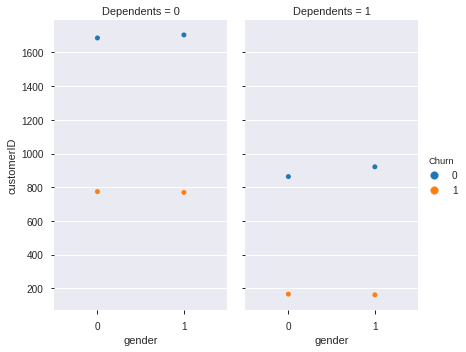

In [13]:
gd = t.groupby(['gender','Dependents','Churn']).count()[['customerID']]
gd = gd.reset_index()
sns.catplot(x= 'gender', y="customerID", hue="Churn",col="Dependents", aspect=.6,kind="swarm", data=gd)


Male = 1, Female = 0, as Label Encoding encounters the value 'Female' first. In both genders, people with dependents show less churn, but males without dependents show less churn than their female counterparts.

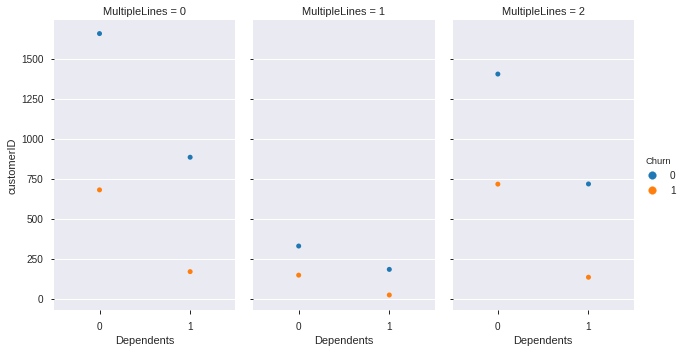

In [15]:
dm = t.groupby(['Dependents','MultipleLines','Churn']).count()[['customerID']]
dm = dm.reset_index()
sns.catplot(x= 'Dependents', y="customerID", hue="Churn",col="MultipleLines", aspect=.6,kind="swarm", data=dm)


No: 0, Yes: 1, No phone service: 2
People with dependents show less churn in all three cases, but the difference is much lower in case of people who also have multiple lines. People with no phone service show the highest churn.

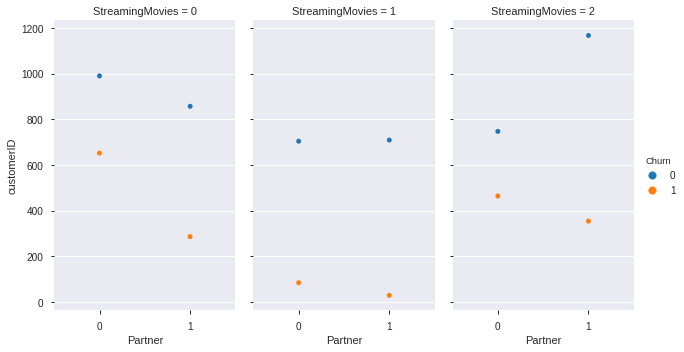

In [18]:
p1 = t.groupby(['Partner','StreamingMovies','Churn']).count()[['customerID']]
p1 = p1.reset_index()
sns.catplot(x= 'Partner', y="customerID", hue="Churn",col="StreamingMovies", aspect=.6,kind="swarm", data=p1)


0: No 1: Yes 2: No Internet Service
People with partners show less churn overall, but the difference is much smaller amongst people who stream movies. The difference is the greatest amongst people who do not. Single people who do not stream movies show the highest churn.

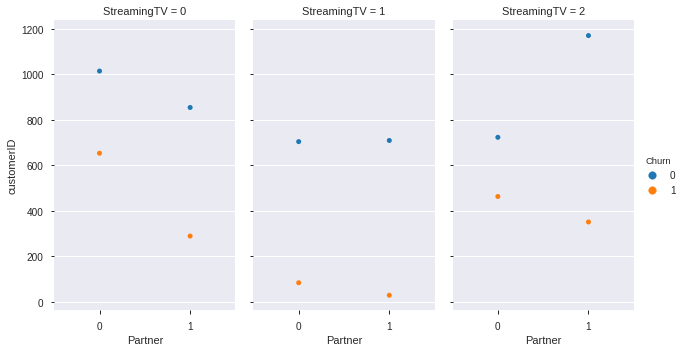

In [26]:
p2 = t.groupby(['Partner','StreamingTV','Churn']).count()[['customerID']]
p2 = p2.reset_index()
sns.catplot(x= 'Partner', y="customerID", hue="Churn",col="StreamingTV", aspect=.6,kind="swarm", data=p2)


0: No 1: Yes 2: No Internet Service
The data values are very similar to those who stream movies, and hence the output is also similar.

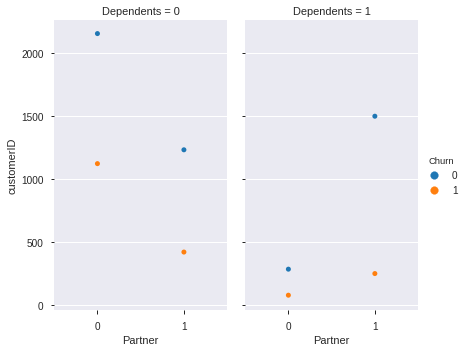

In [21]:
p3 = t.groupby(['Partner','Dependents','Churn']).count()[['customerID']]
p3 = p3.reset_index()
sns.catplot(x= 'Partner', y="customerID", hue="Churn",col="Dependents", aspect=.6,kind="swarm", data=p3)


Amongst people without dependents, single customers show more churn. Amongst people with dependents, people with partners show higher churn.

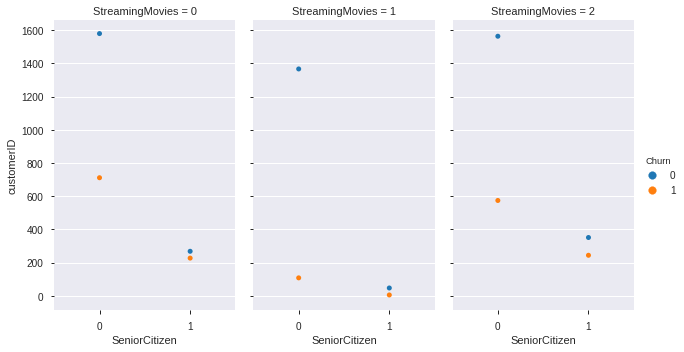

In [22]:
sc1 = t.groupby(['SeniorCitizen','StreamingMovies','Churn']).count()[['customerID']]
sc1 = sc1.reset_index()
sns.catplot(x= 'SeniorCitizen', y="customerID", hue="Churn",col="StreamingMovies", aspect=.6,kind="swarm", data=sc1)


Overall, senior citizens show less churn, and those who watch movies show the least. Younger people who do not watch movies show the highest churn. Amongst senior citizens, movies do not seem to affect churn, as the points are very close to each other.

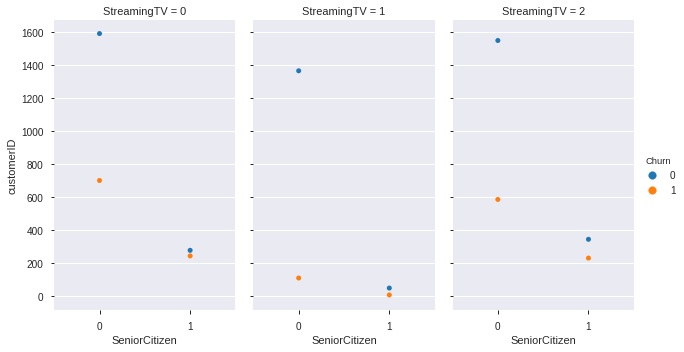

In [24]:
sc2 = t.groupby(['SeniorCitizen','StreamingTV','Churn']).count()[['customerID']]
sc2 = sc2.reset_index()
sns.catplot(x= 'SeniorCitizen', y="customerID", hue="Churn",col="StreamingTV", aspect=.6,kind="swarm", data=sc2)


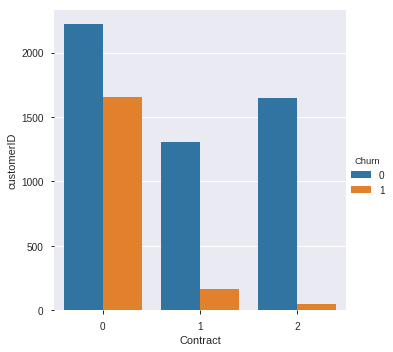

In [28]:
con = t.groupby(['Contract','Churn']).count()[['customerID']]
con = con.reset_index()
sns.catplot(x="Contract", y="customerID", hue="Churn", kind="bar", data=con)

* 0: Month to Month,1: Two years, 2: One year
People with month to month contracts leave more often, followed by people with two year contracts. One year contracts seem the safest.

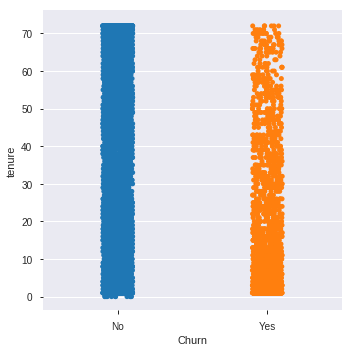

In [34]:
ten = t.groupby(['Churn','tenure']).count()[['customerID']]
ten = ten.reset_index()
sns.catplot(x="Churn", y="tenure", order=["No", "Yes"], data=telcodata);

The scatter points reduce higher up, indicating that people with longer tenures are less likely to leave.

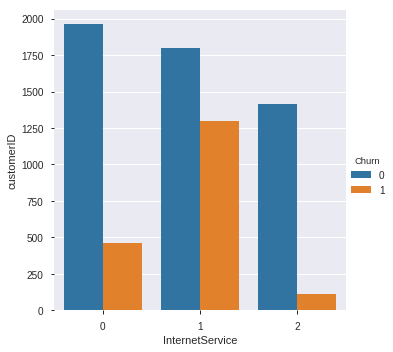

In [31]:
internet = t.groupby(['InternetService','Churn']).count()[['customerID']]
internet = internet.reset_index()
sns.catplot(x="InternetService", y="customerID", hue="Churn", kind="bar", data=internet)

0: Fiber Optic 1: DSL 2: No
People with DSL connections show higher churn

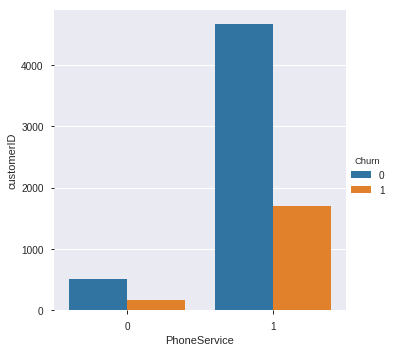

In [32]:
ps = t.groupby(['PhoneService','Churn']).count()[['customerID']]
ps = ps.reset_index()
sns.catplot(x="PhoneService", y="customerID", hue="Churn", kind="bar", data=ps)

People without phone service show higher churn.